<a href="https://colab.research.google.com/github/camminady/overweight/blob/master/main_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
!pip install git+git://github.com/geopandas/geopandas.git
!pip install descartes
import geopandas
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 

  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-ollhhi_h
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-ollhhi_h
  Stored in directory: /tmp/pip-ephem-wheel-cache-qmbhluv3/wheels/91/24/71/376c9c67192694168352afcccc2d264248f7e2cc6192997186
Successfully built geopandas


In [0]:
genders=['men','females','adults']
categories = ['overweight','obese']

gender = genders[0]
category = categories[0]

name = gender+"_"+category
filename = 'https://raw.githubusercontent.com/camminady/overweight/master/share-of-'+gender+'-defined-as-'+category+'.csv'
df = pd.read_csv(filename)

df.rename(columns={ df.columns[0]: "name" },inplace=True)
df.rename(columns={ df.columns[3]: name },inplace=True)

In [0]:
# take care of different naming in world vs. obesity data 
toprint = False
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands")]
world = world.merge(df[df.Year==2017].filter(items=['name',name]),how='left',on='name')
A = set(np.unique(world.name.values)) # all names in world map 
B = set(world[pd.isna(world["men_overweight"])].name.values) # all names in world map that have NaN 
C = set(df.name.values) # all names that we have in the obesity table
if toprint:
    print('\nProblems before merge:\n')
    print("Countries without data:")
    print(B)
    print(" \nData unassigned:")
    print(C.difference(A))
    
old = ["Cote d'Ivoire",'Palestinian Territories','Bosnia and Herzegovina','Democratic Republic of Congo','Czech Republic','Central African Republic',
      'United States','Dominican Republic','Somaliland region','Sudan (former)','Solomon Islands']
new = ["Côte d'Ivoire",'Palestine','Bosnia and Herz.','Dem. Rep. Congo','Czechia','Central African Rep.',
      'United States of America','Dominican Rep.','Somalia','S. Sudan','Solomon Is.']

for pos,o in enumerate(old):
    try:
        df.loc[df.name == o, "name" ] = new[pos]
    except:
        pass
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands")]
world = world.merge(df[df.Year==2017].filter(items=['name',name]),how='left',on='name')
A = set(np.unique(world.name.values)) # all names in world map 
B = set(world[pd.isna(world["men_overweight"])].name.values) # all names in world map that have NaN 
C = set(df.name.values) # all names that we have in the obesity table
if toprint:
    print('\n\nProblems after merge:\n')
    print("Countries without data:")
    print(B)
    print(" \nData unassigned:")
    print(C.difference(A))

1975


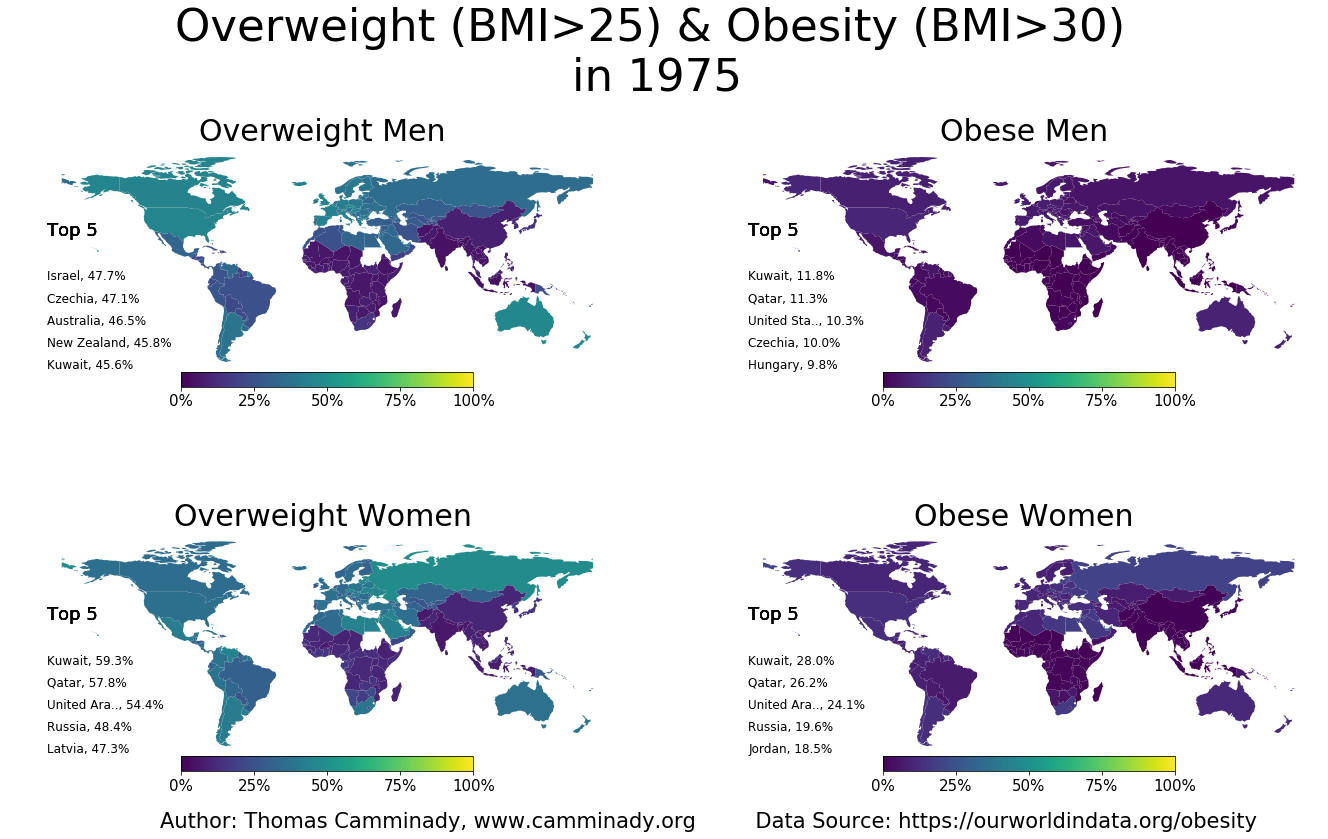

1976


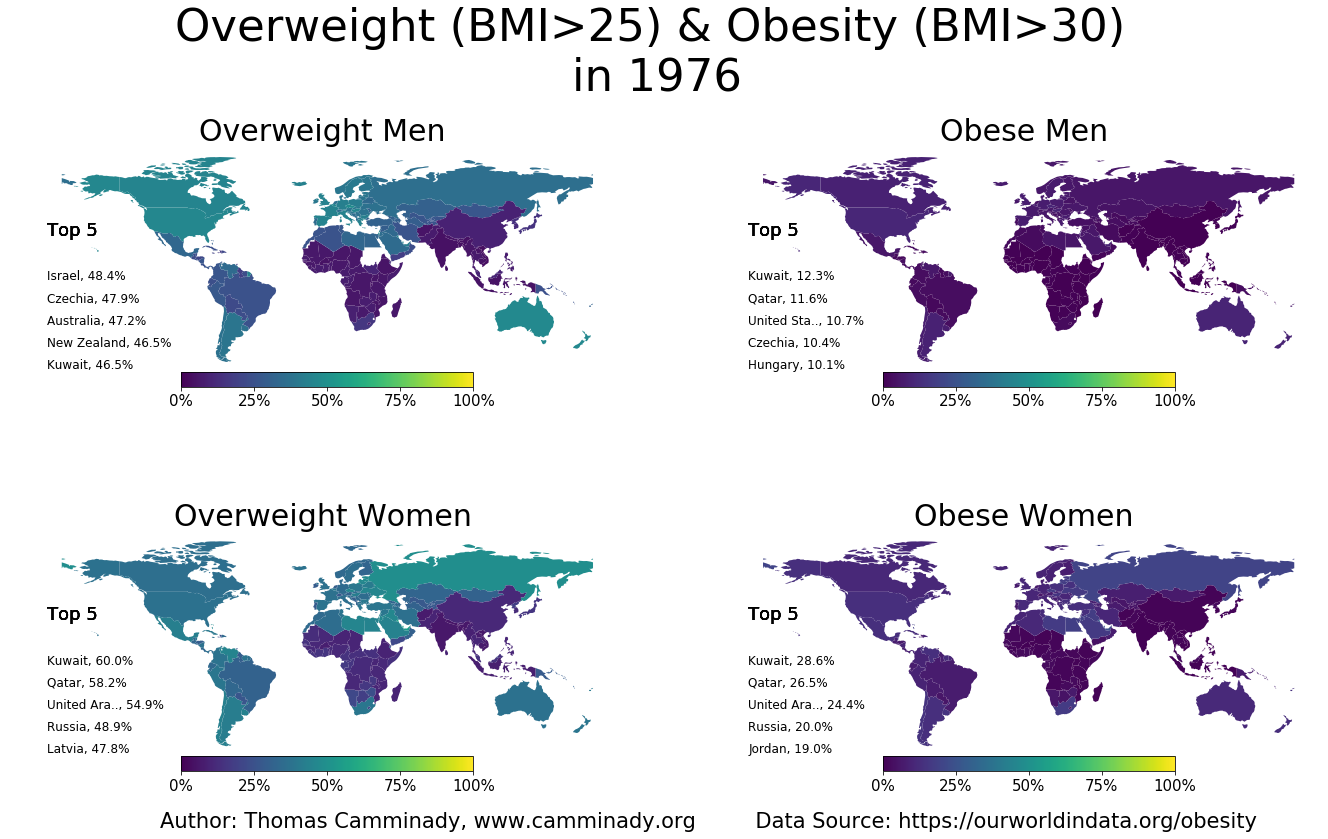

1977


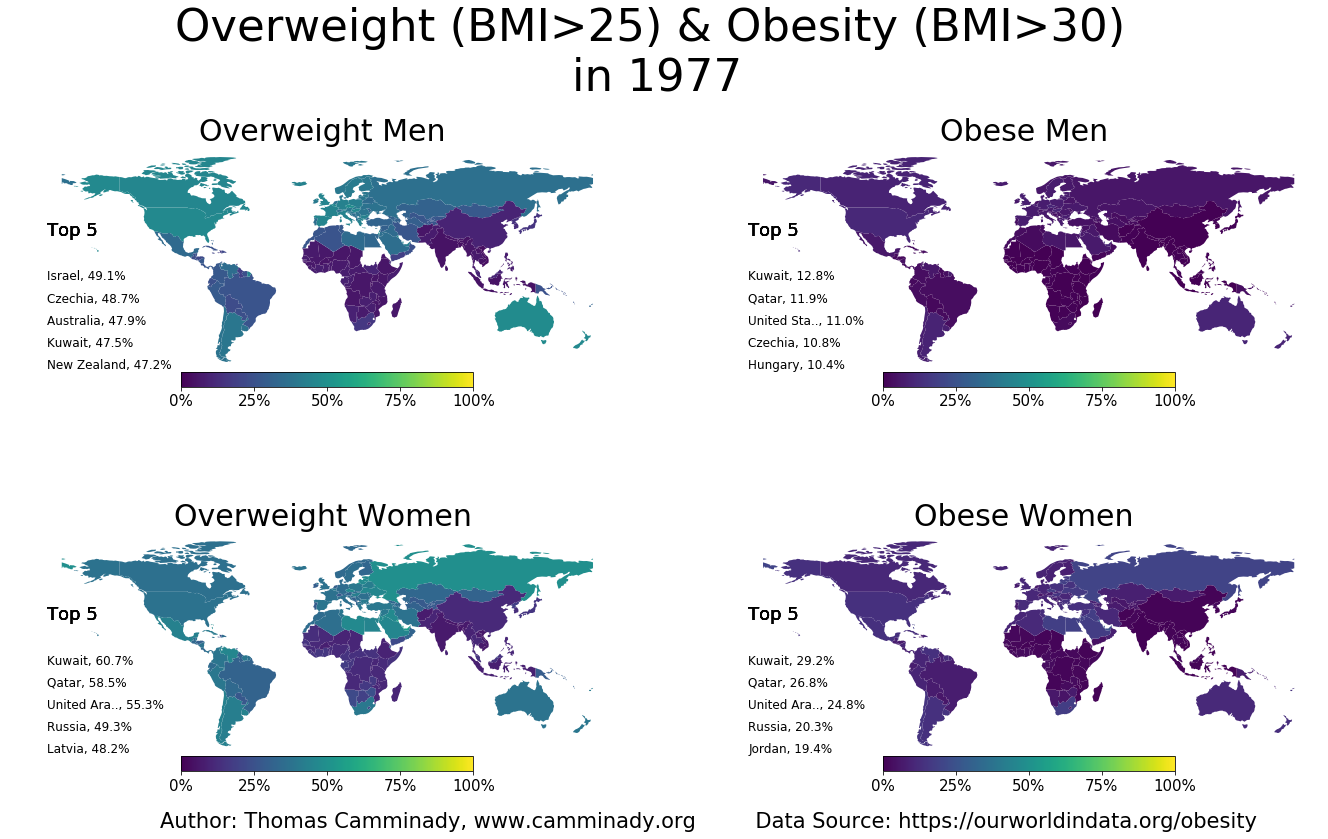

1978


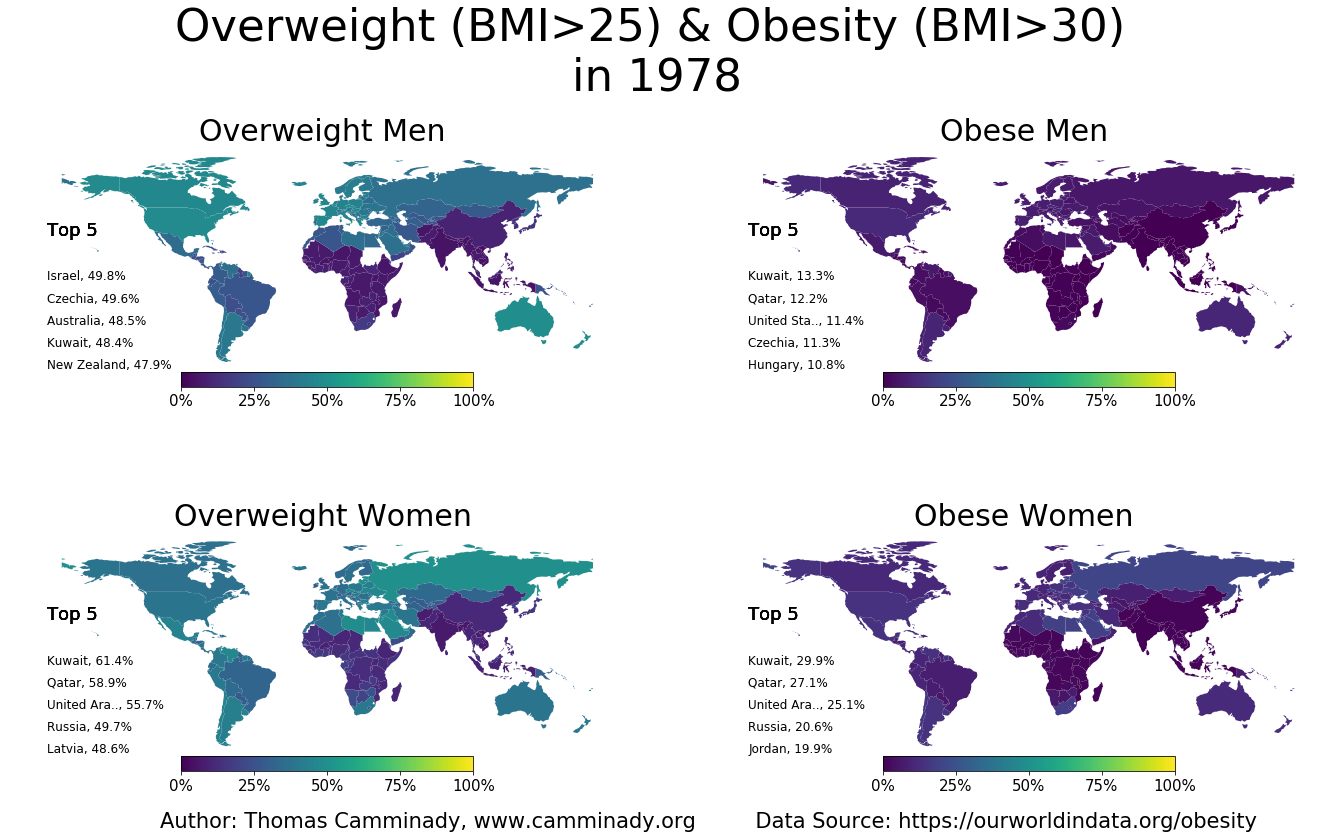

1979


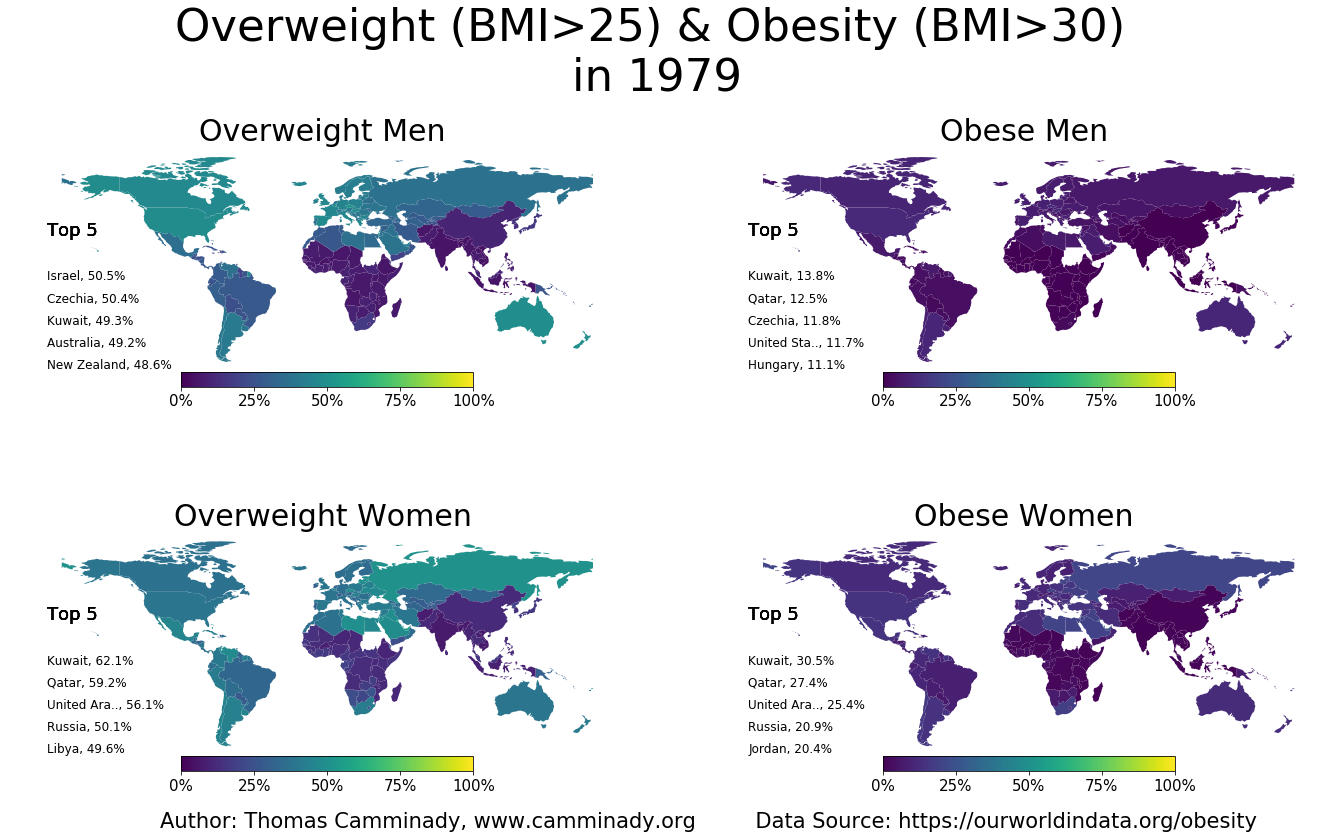

1980


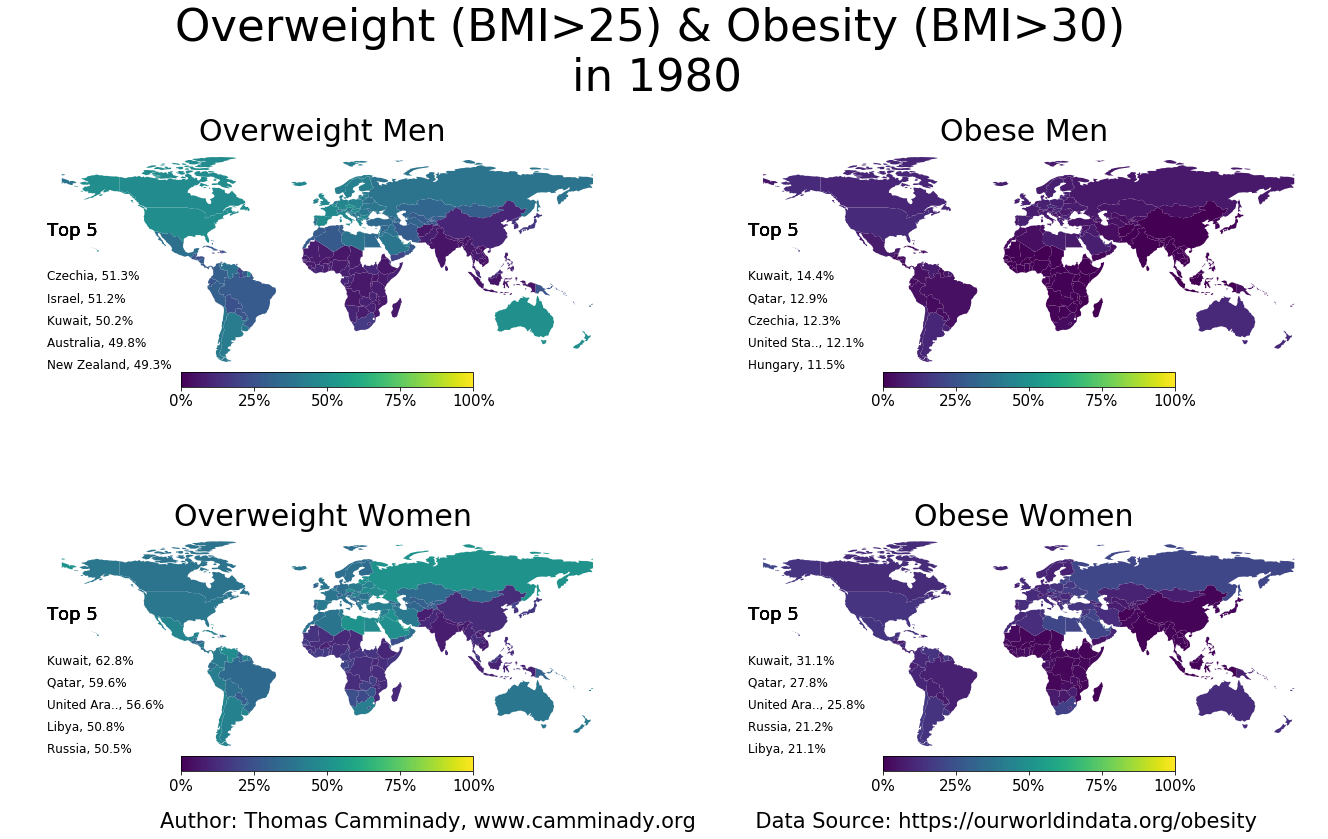

1981


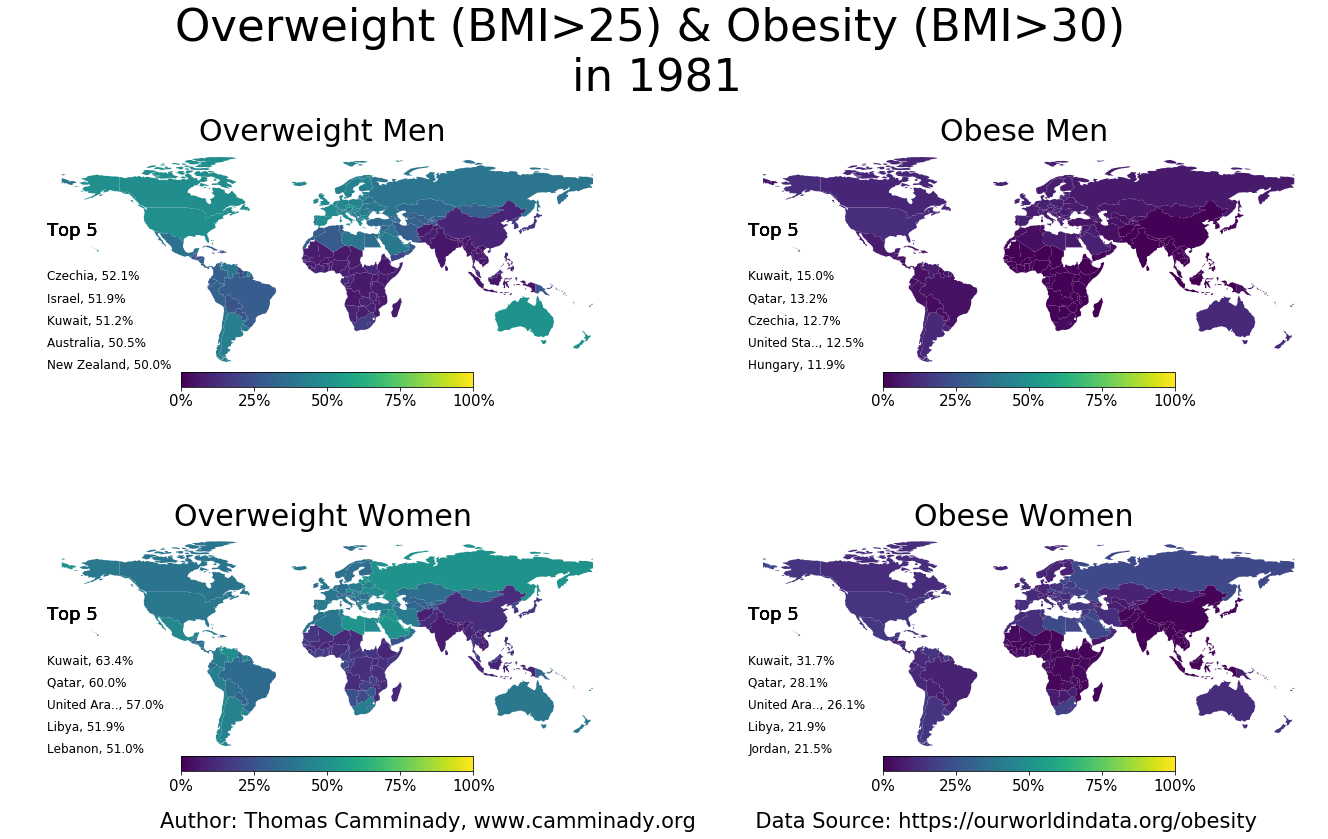

1982


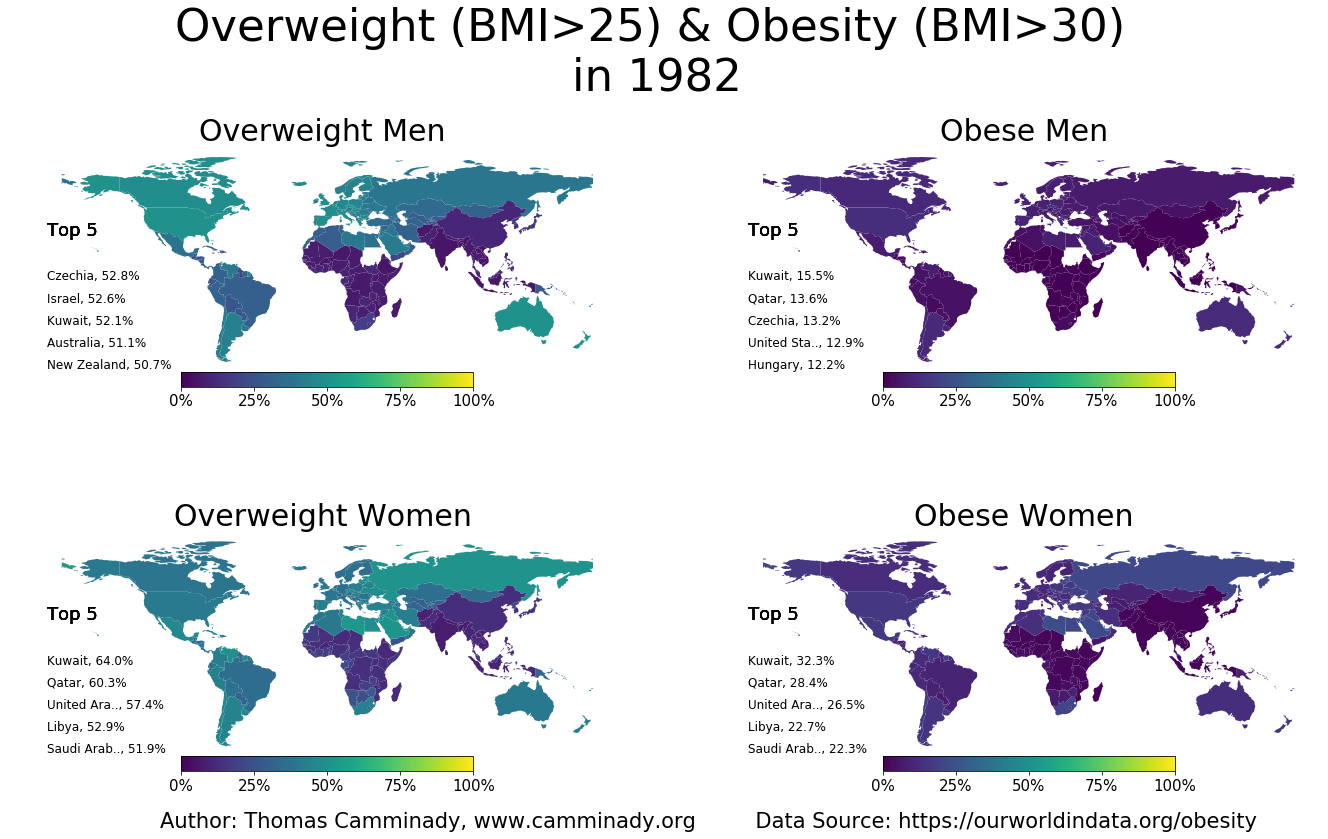

1983


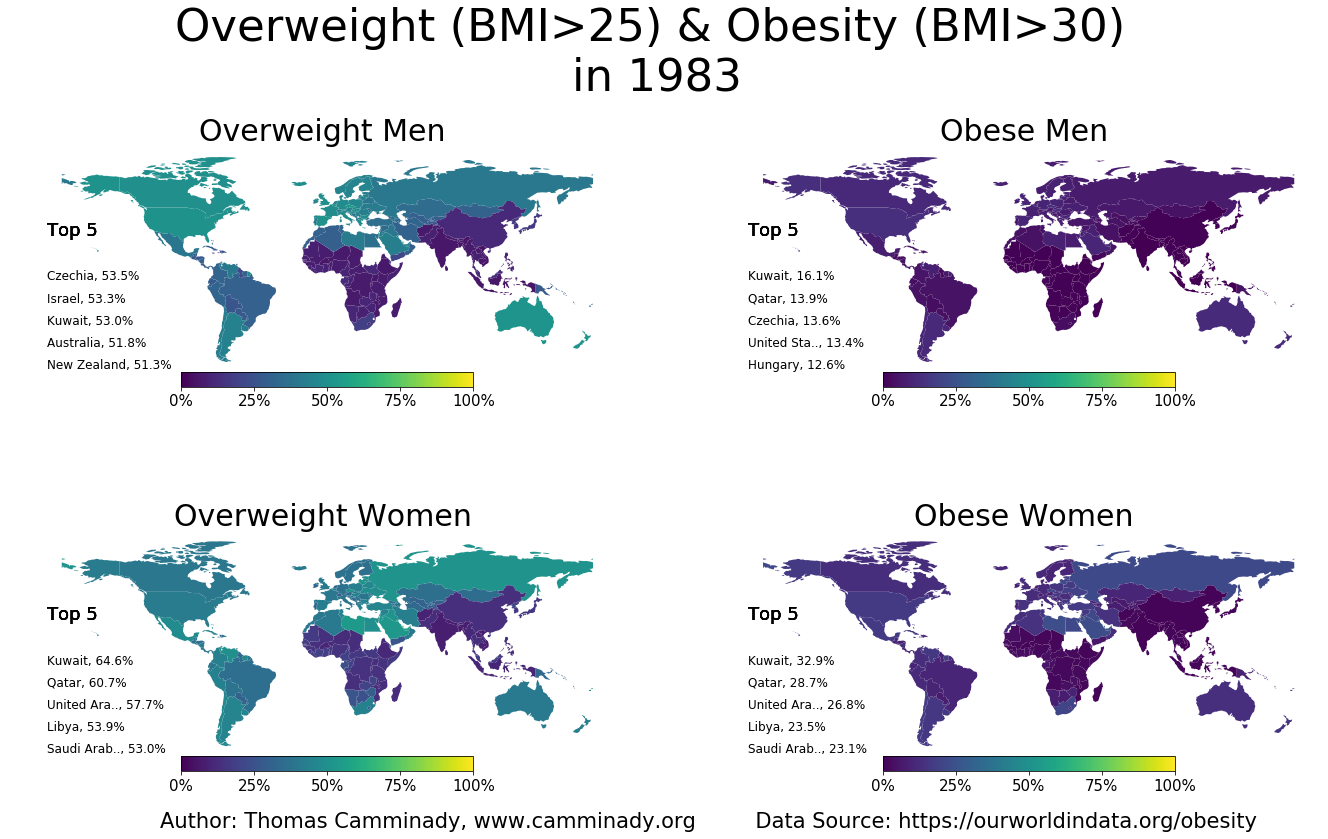

1984


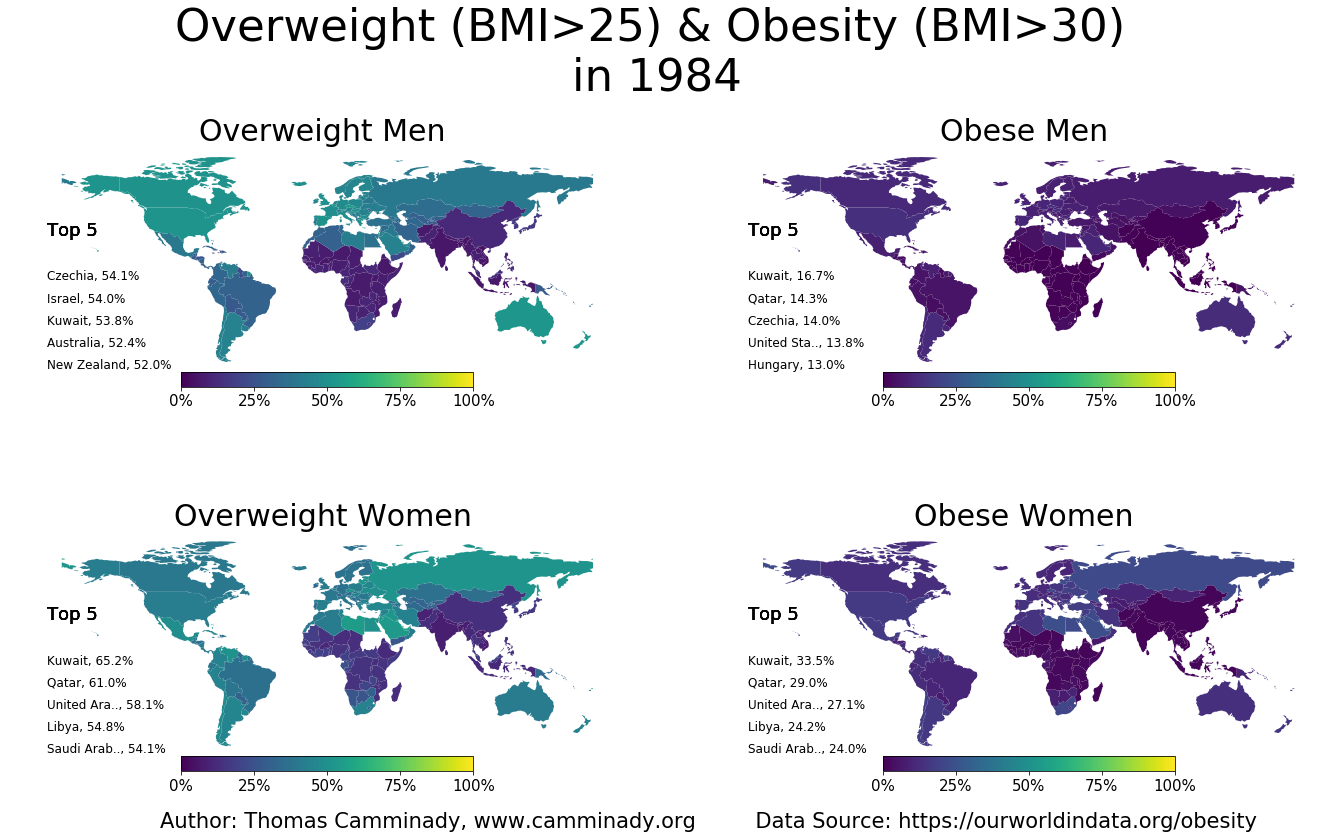

1985


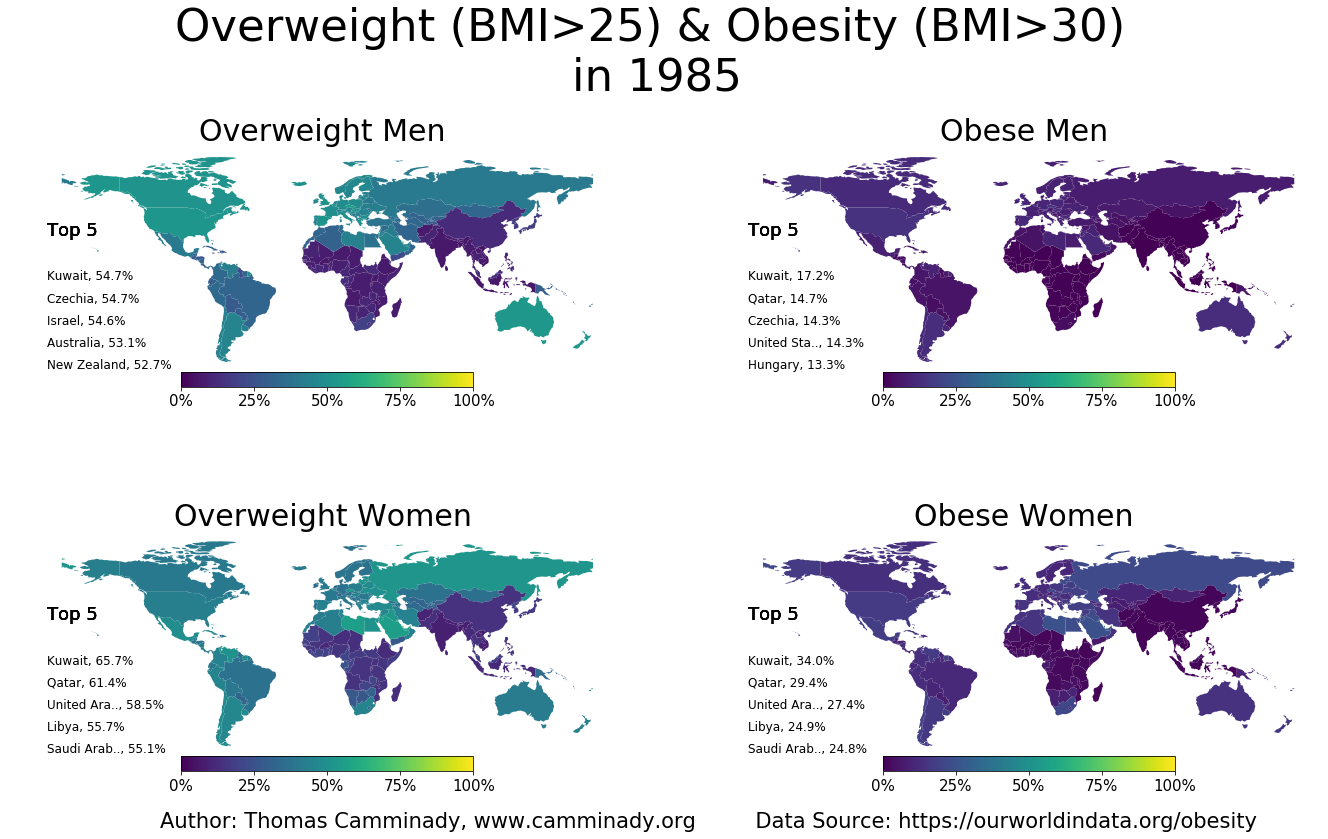

1986


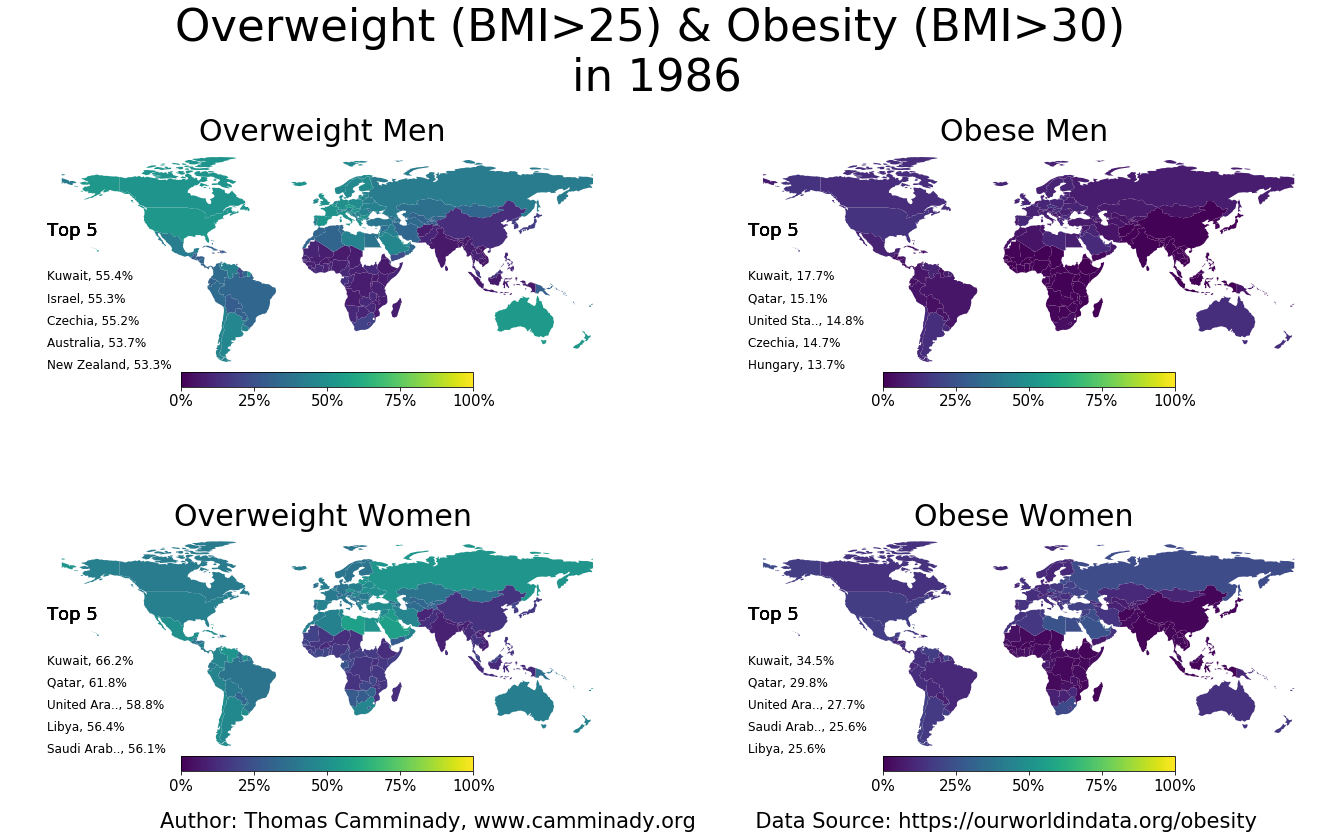

1987


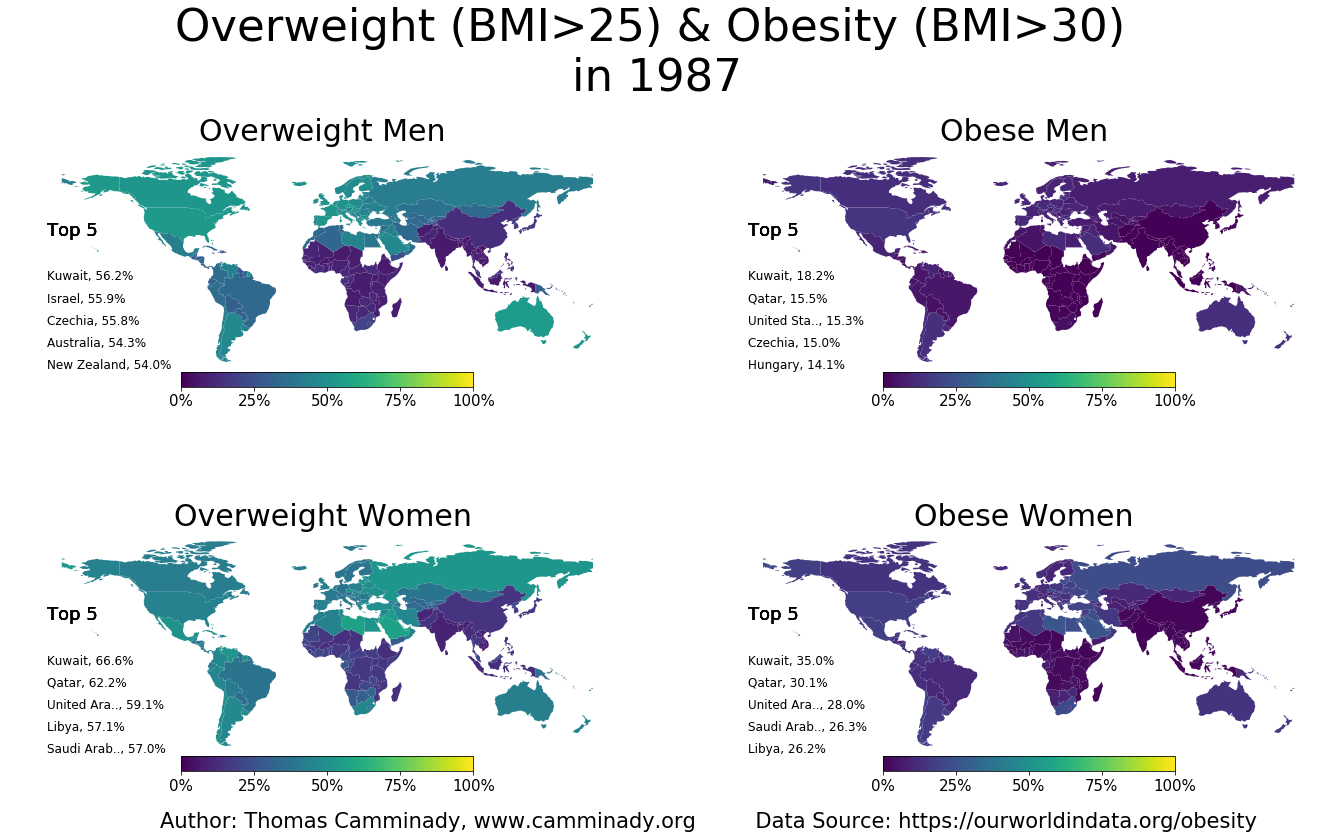

1988


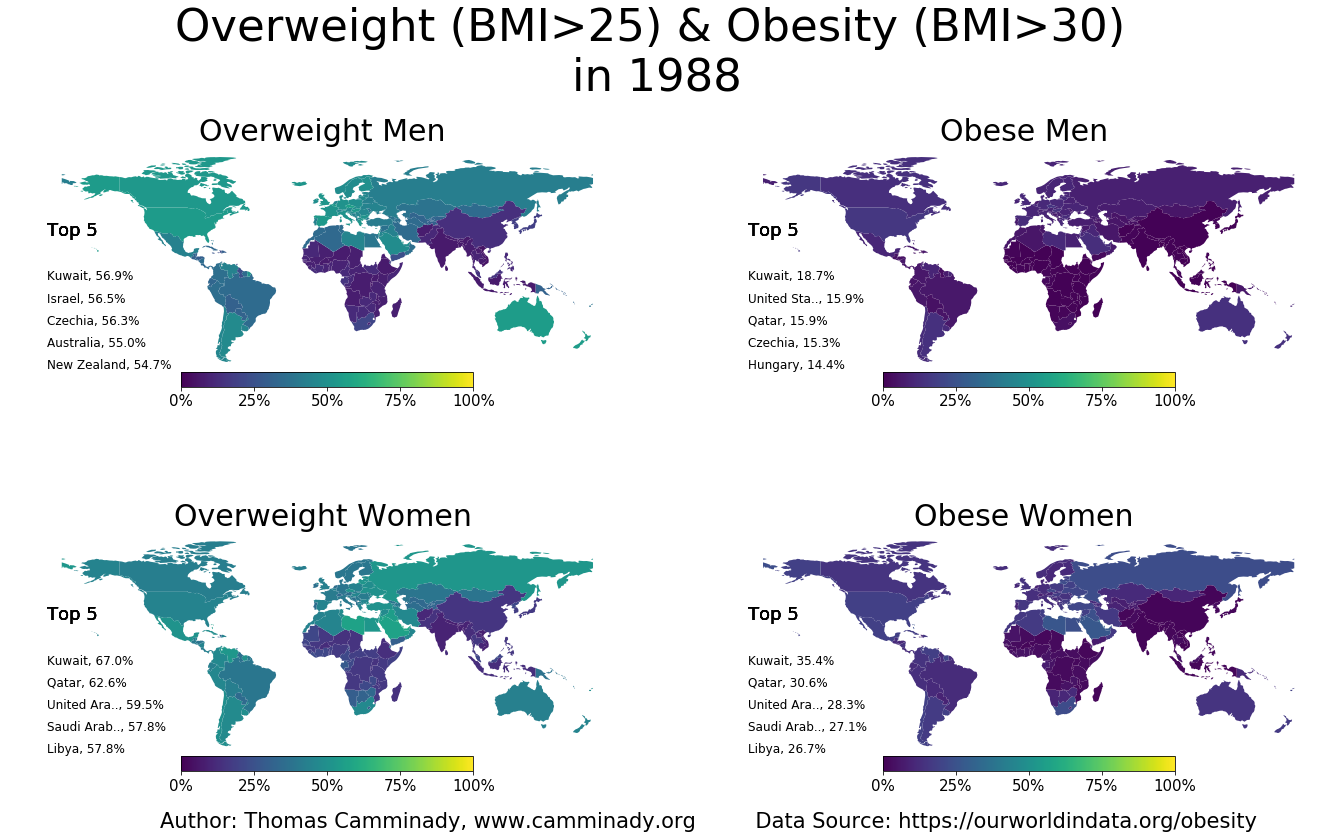

1989


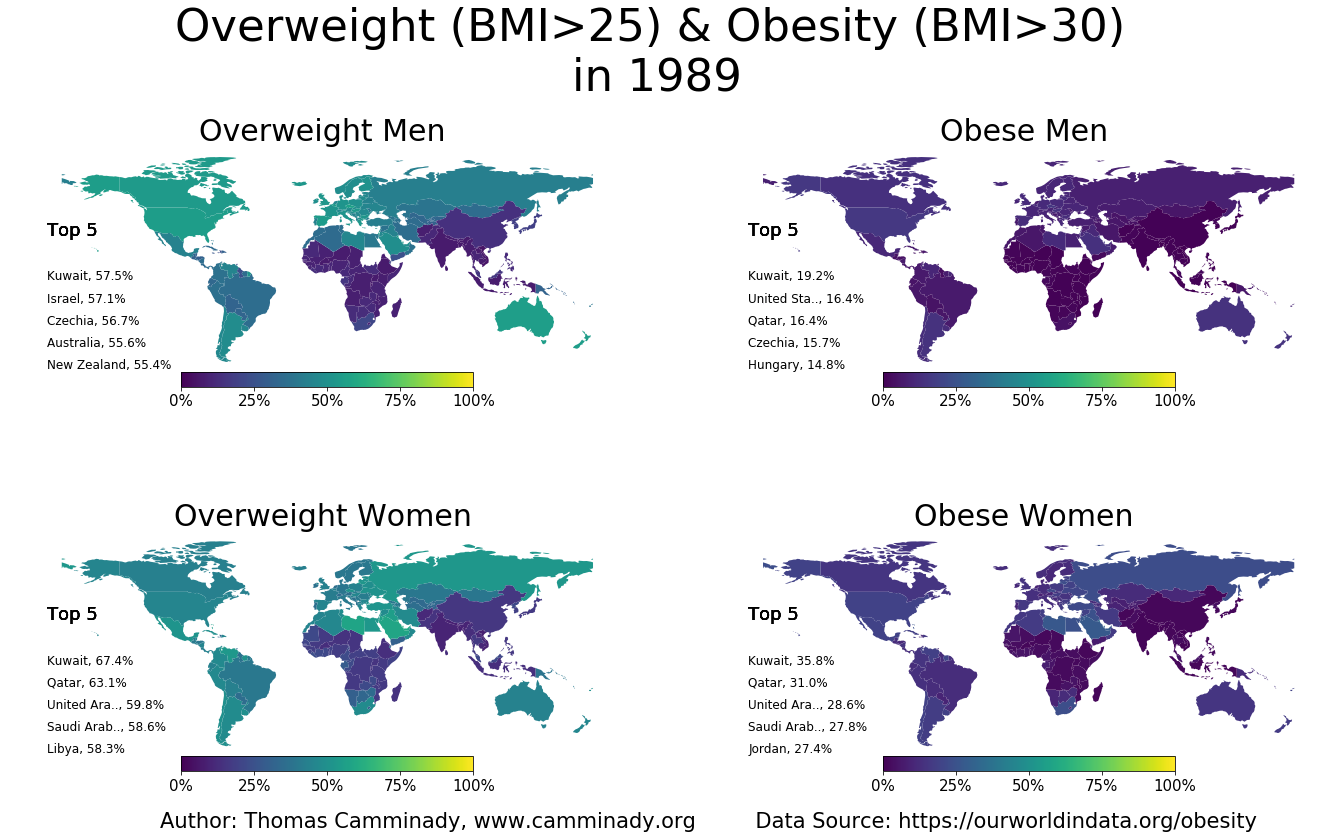

1990


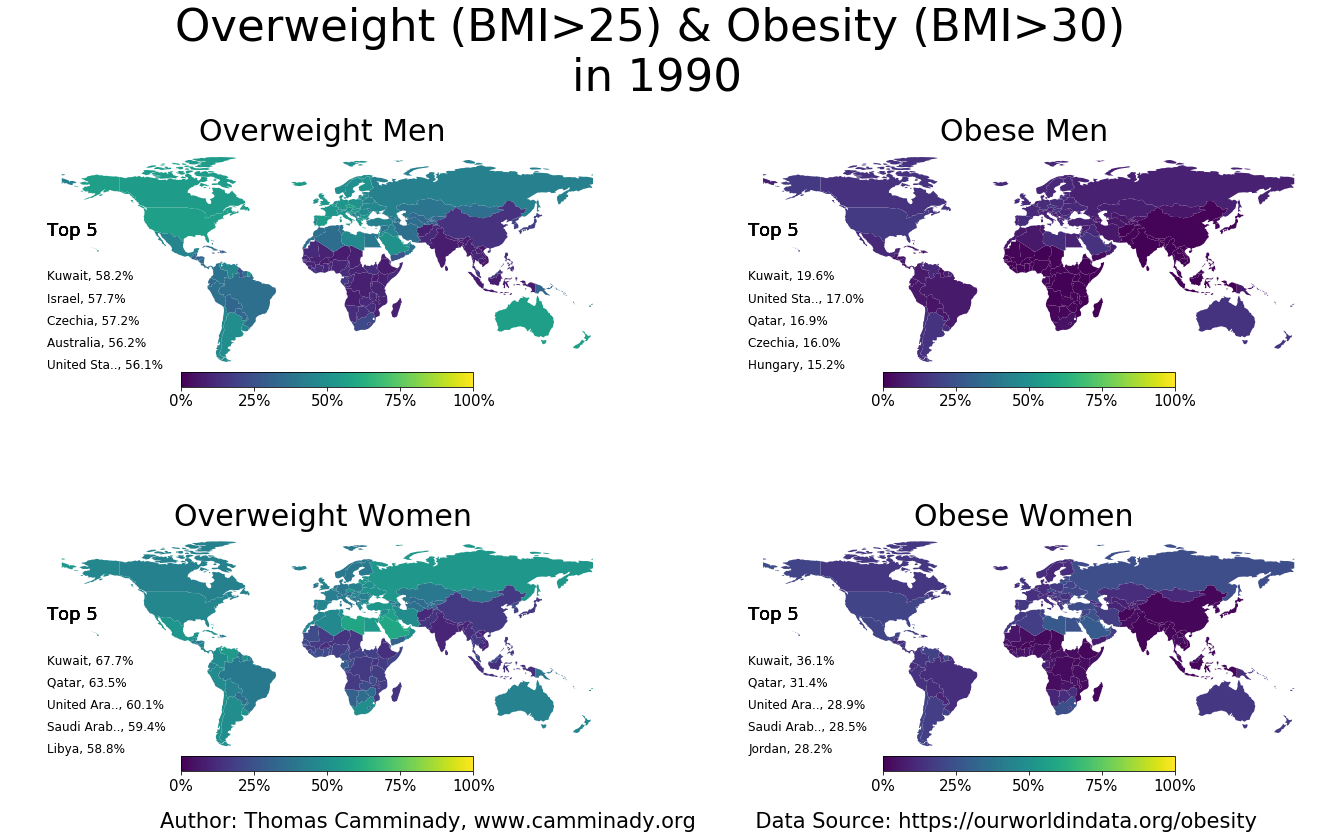

1991


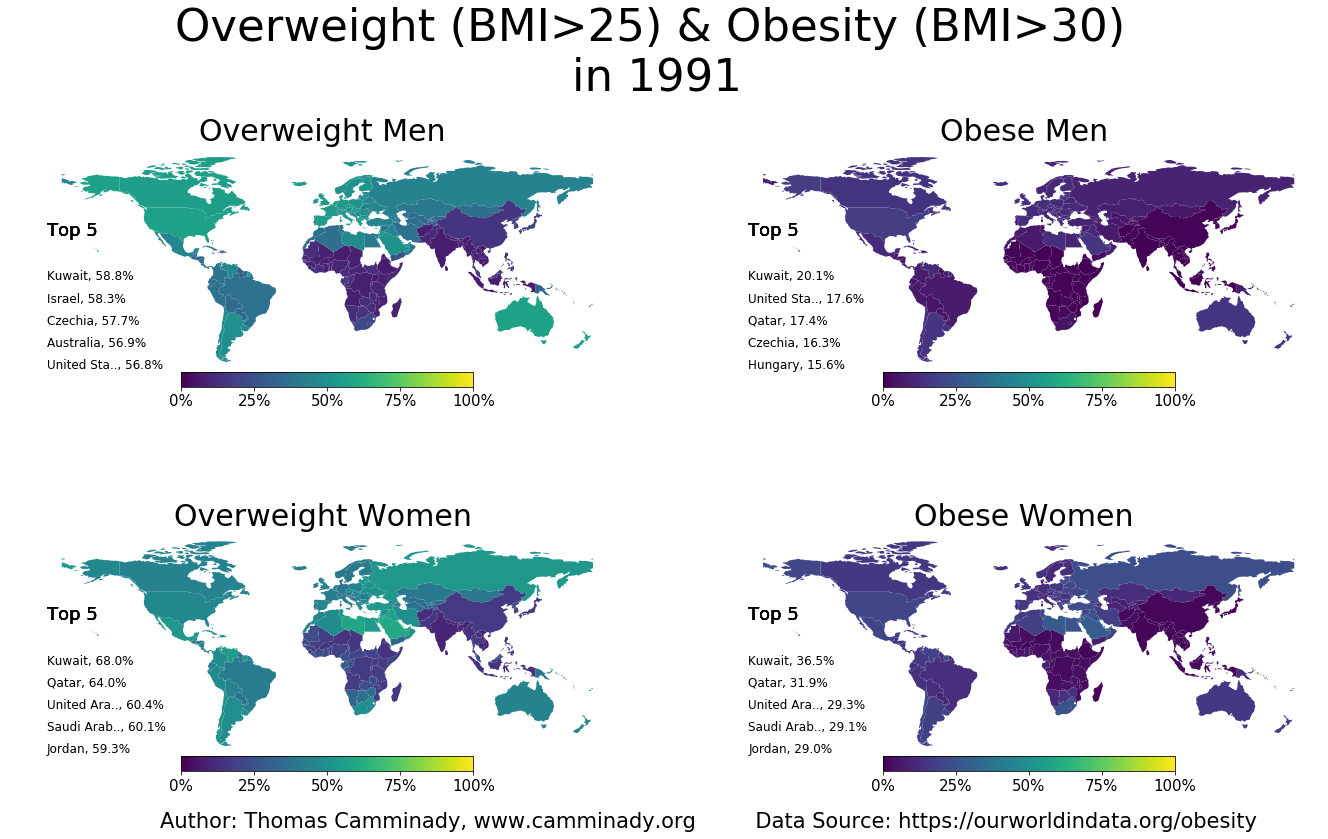

1992


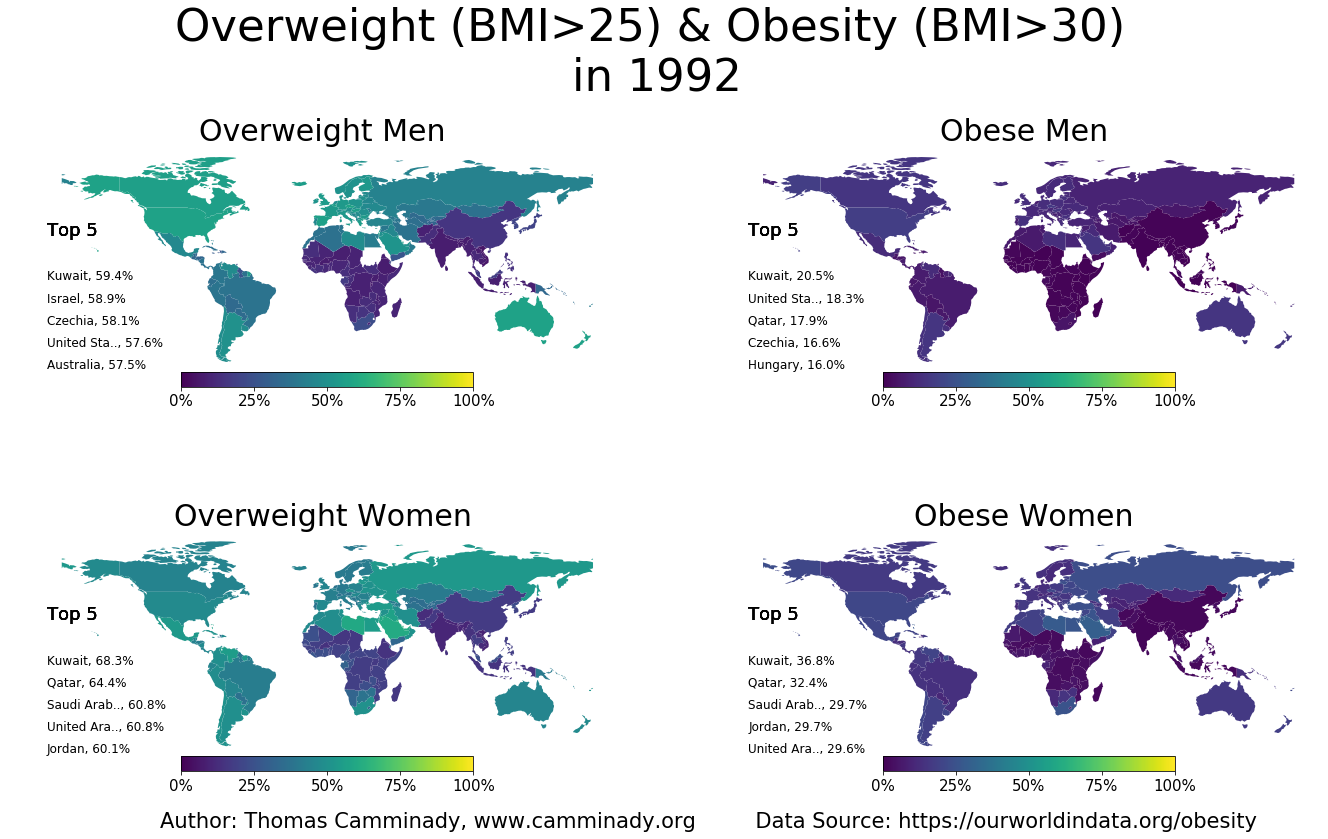

1993


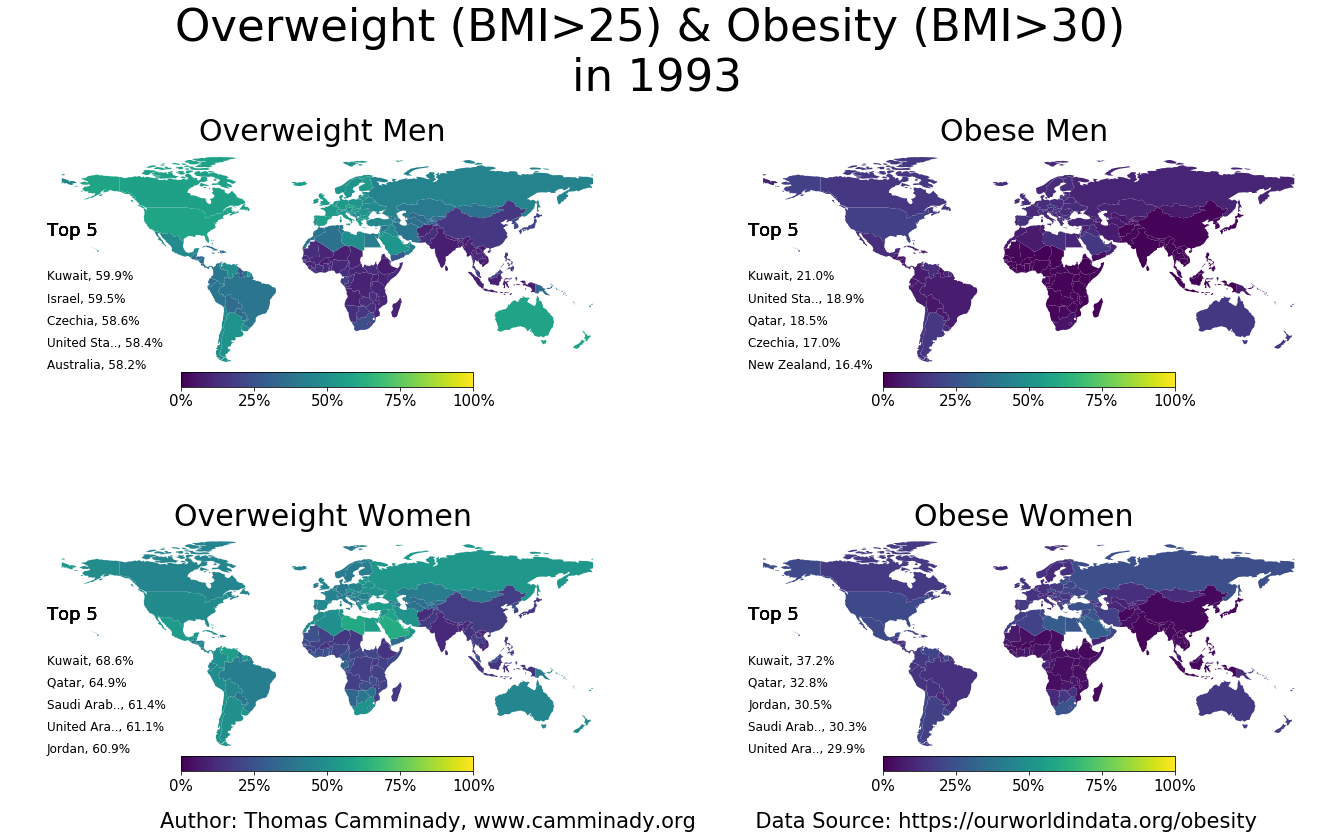

1994


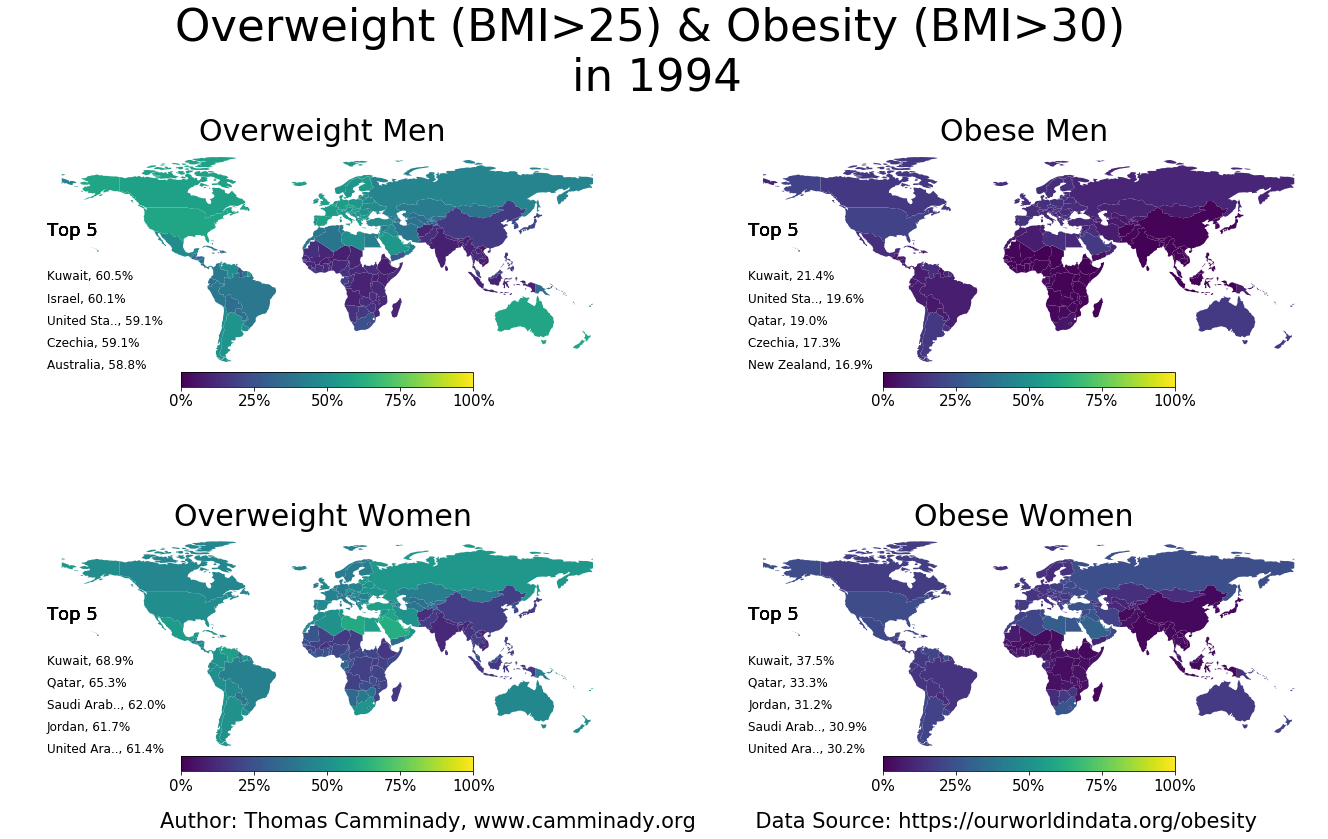

1995


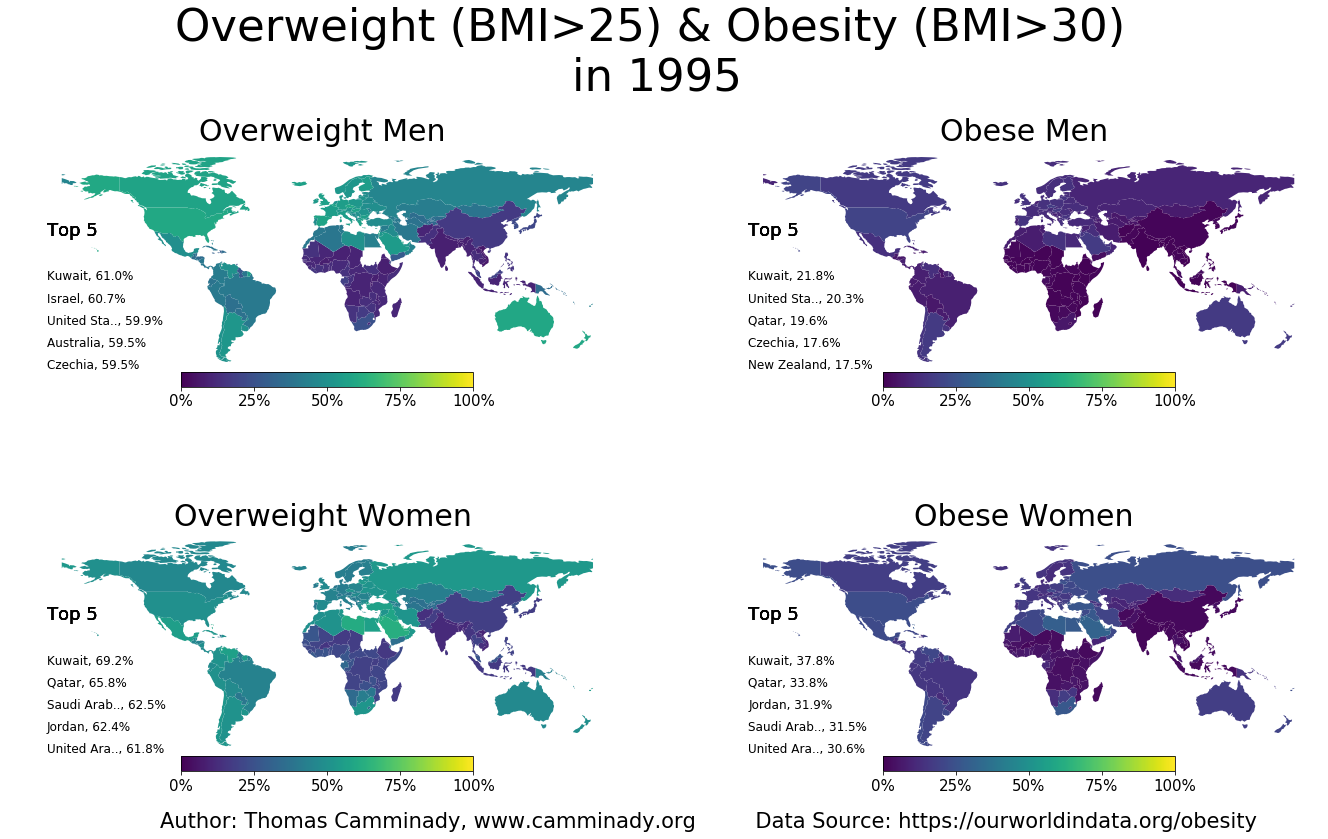

1996


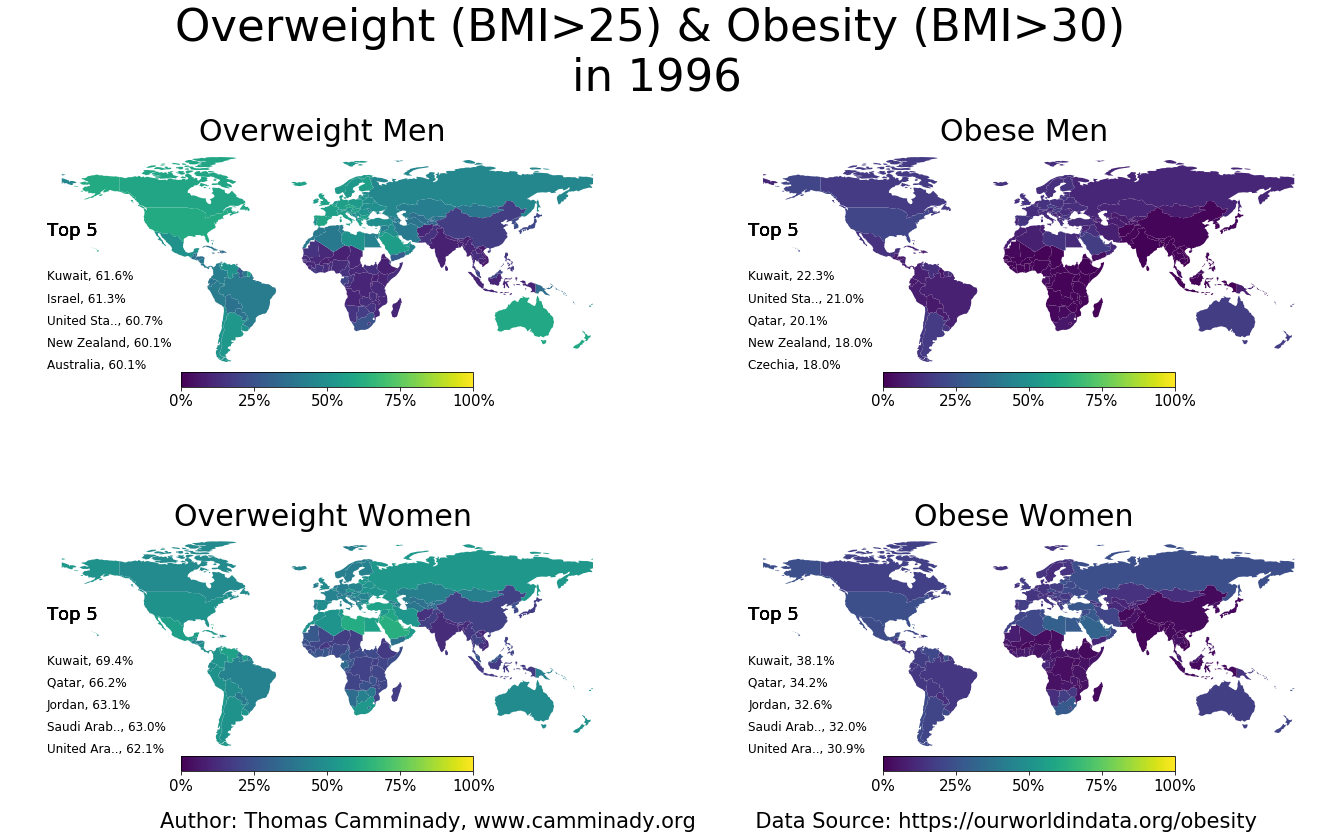

1997


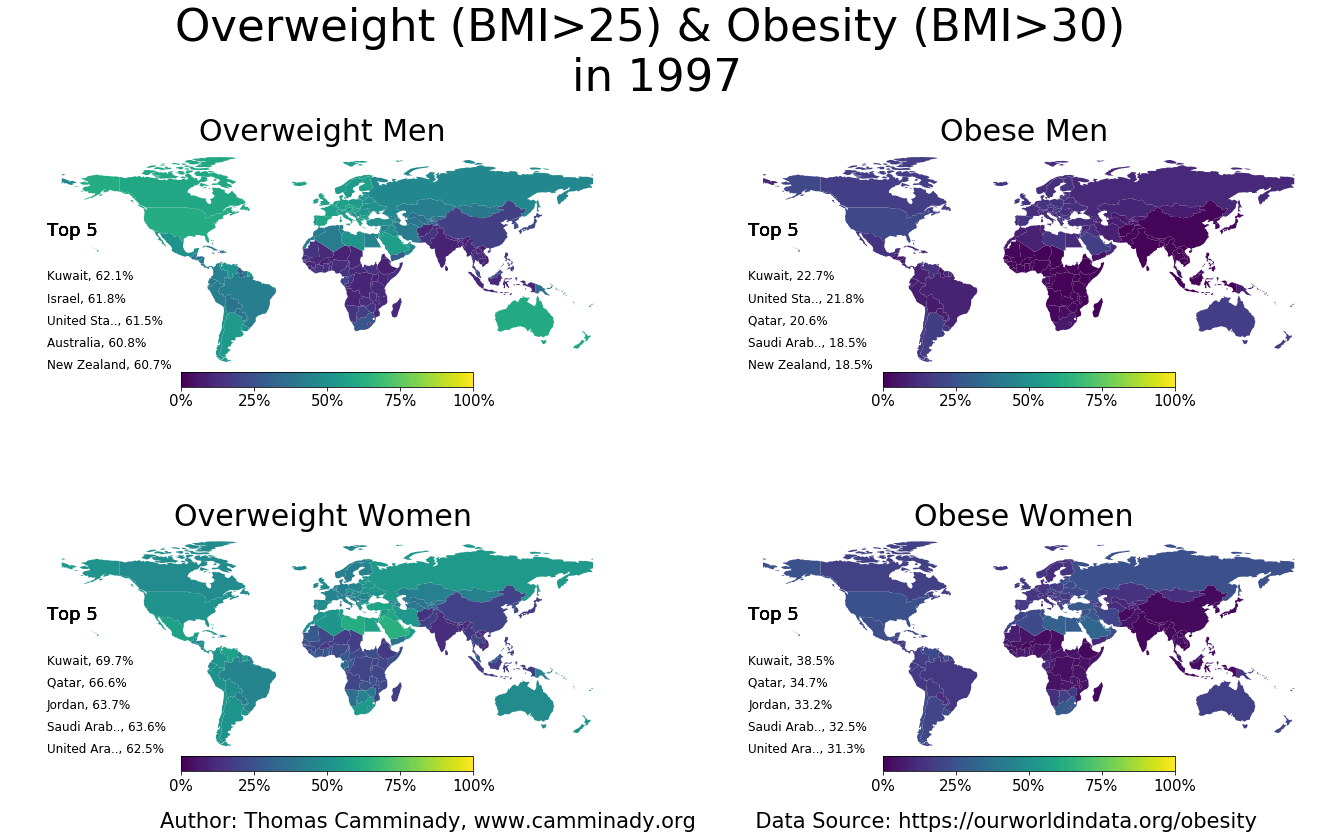

1998


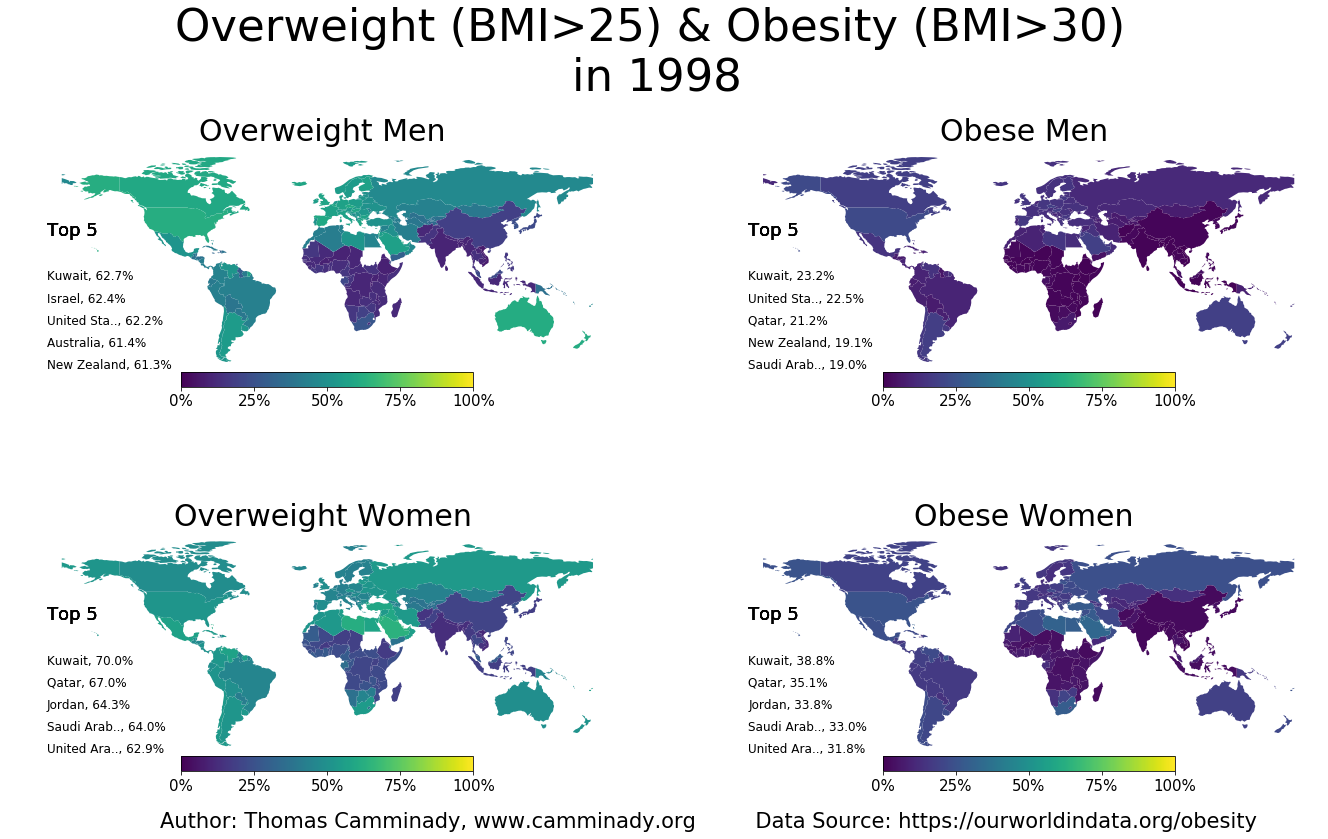

1999


In [0]:
world.dropna(inplace=True)

scale = 0.3

for year in range(1975,2017):
    print(year)
    fig, axs = plt.subplots(2,2,figsize=(scale*2*1920/50,scale*2*1080/50))
    fig.suptitle('Overweight (BMI>25) & Obesity (BMI>30) \nin {}'.format(year),fontsize=scale*150) # or plt.suptitle('Main title')
    plt.text(0.2, 0.1, 'Author: Thomas Camminady, www.camminady.org         Data Source: https://ourworldindata.org/obesity',fontsize=scale*70, transform=plt.gcf().transFigure)
    counter = 0 
    for gender in genders[:2]:
        for category in categories:
            name = gender+"_"+category
            filename = 'https://raw.githubusercontent.com/camminady/overweight/master/share-of-'+gender+'-defined-as-'+category+'.csv'
            df = pd.read_csv(filename)

            df.rename(columns={ df.columns[0]: "name" },inplace=True)
            df.rename(columns={ df.columns[3]: name },inplace=True)
            old = ["Cote d'Ivoire",'Palestinian Territories','Bosnia and Herzegovina','Democratic Republic of Congo','Czech Republic','Central African Republic',
                  'United States','Dominican Republic','Somaliland region','Sudan (former)','Solomon Islands']
            new = ["Côte d'Ivoire",'Palestine','Bosnia and Herz.','Dem. Rep. Congo','Czechia','Central African Rep.',
                  'United States of America','Dominican Rep.','Somalia','S. Sudan','Solomon Is.']

            for pos,o in enumerate(old):
                try:
                    df.loc[df.name == o, "name" ] = new[pos]
                except:
                    pass
            ax = axs[counter//2,counter%2]
            cmap = "viridis"
            world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
            world = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands")]
            tmp = df[df.Year==year].filter(items=['name',name])
            world = world.merge(tmp,how='left',on='name')
            world =  world.dropna()
            ax = world.plot(column=name,cmap=cmap,ax=ax, vmin=0,vmax=100,legend=False)
            #world.sort(column=name,inplace=True,ascending=False)
            world.sort_values(by=name,inplace=True,ascending=False)
            for pos,country in enumerate(world.name):
                posx = world[world.name == country].geometry.centroid.x.values
                posy = world[world.name == country].geometry.centroid.y.values
                tmp = world[world.name==country]
                val = tmp[name].values[0]
                
                if pos>4:
                    break
                cname = country
                if len(cname)>11:
                    cname = cname[:10] + ".."
                ax.annotate(s="{}, {}%".format(cname,val), xy=[-190,0-pos*15], ha='left',color ='black',fontsize=scale*40)
                ax.annotate(s="Top 5",xy = [-190,30],ha='left',color='black',fontsize=scale*60)
                
            G = gender.capitalize() if gender=="men" else "Women"
            ax.set_title("{} {} ".format(category.capitalize(),G),fontsize=100*scale)
            ax.axis('off')
            sm = plt.cm.ScalarMappable(cmap=cmap,norm=plt.Normalize(vmin=0, vmax=100))
            sm._A = []
            cbar = plt.colorbar(sm,orientation="horizontal", pad=0,shrink=0.5,ax=ax)
            cbar.set_ticks([0, 25, 50, 75, 100])
            cbar.set_ticklabels(['0%', '25%','50%', '75%', '100%'])
            cbar.ax.tick_params(labelsize=50*scale)
            counter += 1 
    #dpi = 25
    #plt.savefig('figs/{:02d}.png'.format(year-1975),bbox_inches='tight',dpi=dpi)
    #plt.close("all")
    plt.show()